<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/25_4_Assignment_Hierarchical_3_11_20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward**. 

Which linkage method do you think produces more reasonable result?


Apply agglomerative clustering to the heart disease data by setting n_clusters=2. 

**Try the three linkage methods above and get ARI and silhouette scores for each of your solutions**.

 Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint.
 
  Which algorithm and setting does perform better?

X = heart.iloc[:-1, :13] y = heart.iloc[:-1, 13]

In [0]:
import numpy as np
import pandas as pd
import scipy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from collections import Counter

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hd0 = pd.read_sql_query('select * FROM heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
heart=hd0.copy()

heart = heart[:-1]

list(heart)``

  **HERE IS THE MISSING PART**

# Make sure the number of rows divides evenly into four samples.
rows = heart.shape[0] - heart.shape[0] % 2
df = heart.iloc[:rows, :]

In [0]:
# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]


# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

plt.rcParams["figure.figsize"] = [10,5]
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(8,4))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 20}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
#plt.tight_layout()
#plt.show

##**DENDOGRAMS**

**`COMPLETE`**

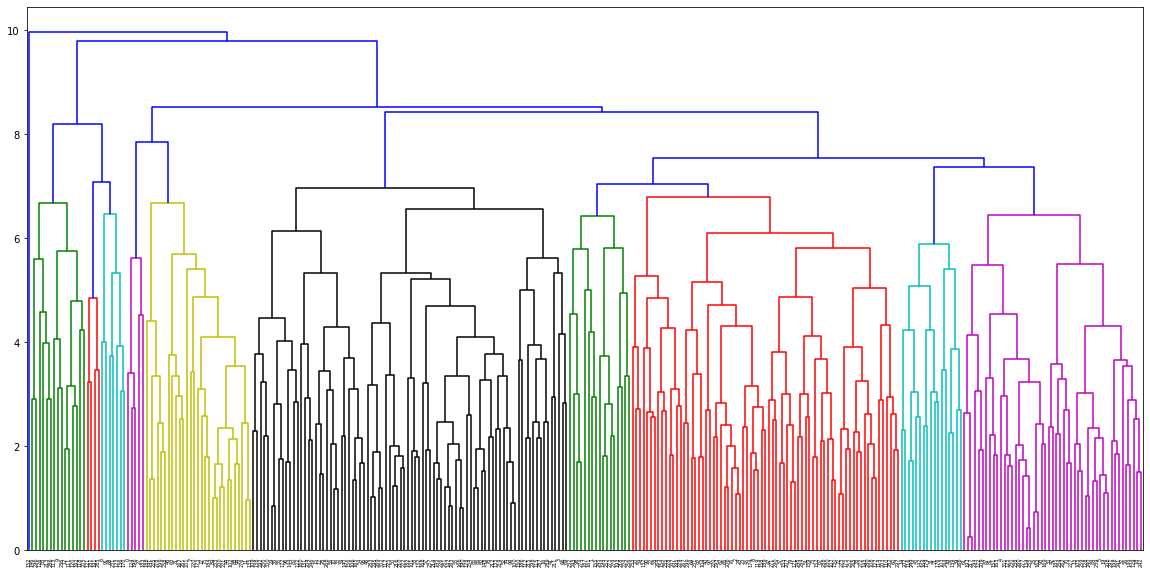

In [26]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

**AVERAGE**

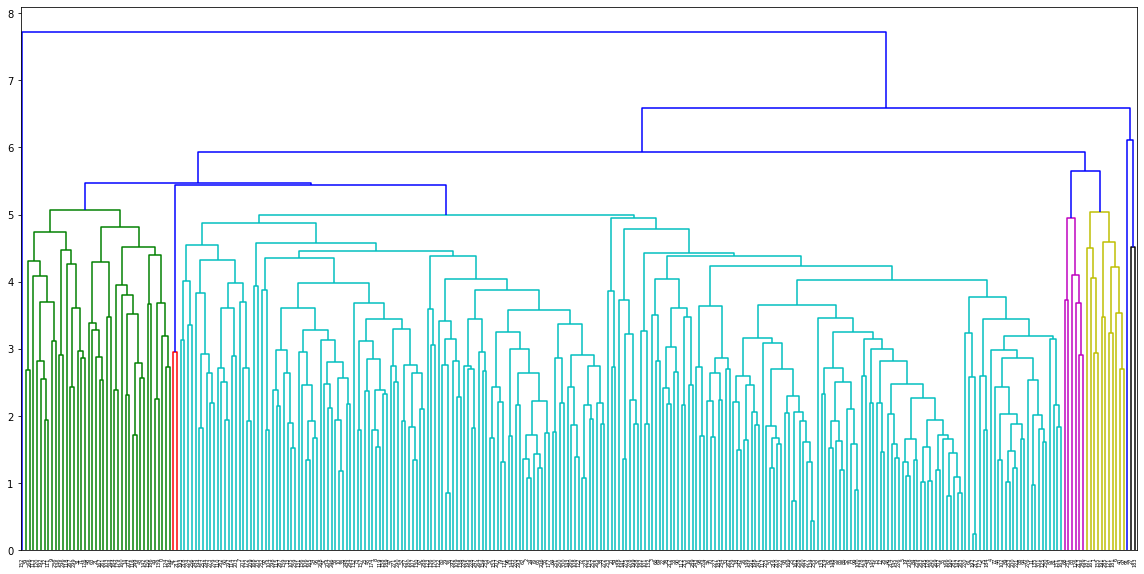

In [27]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

**WARD**

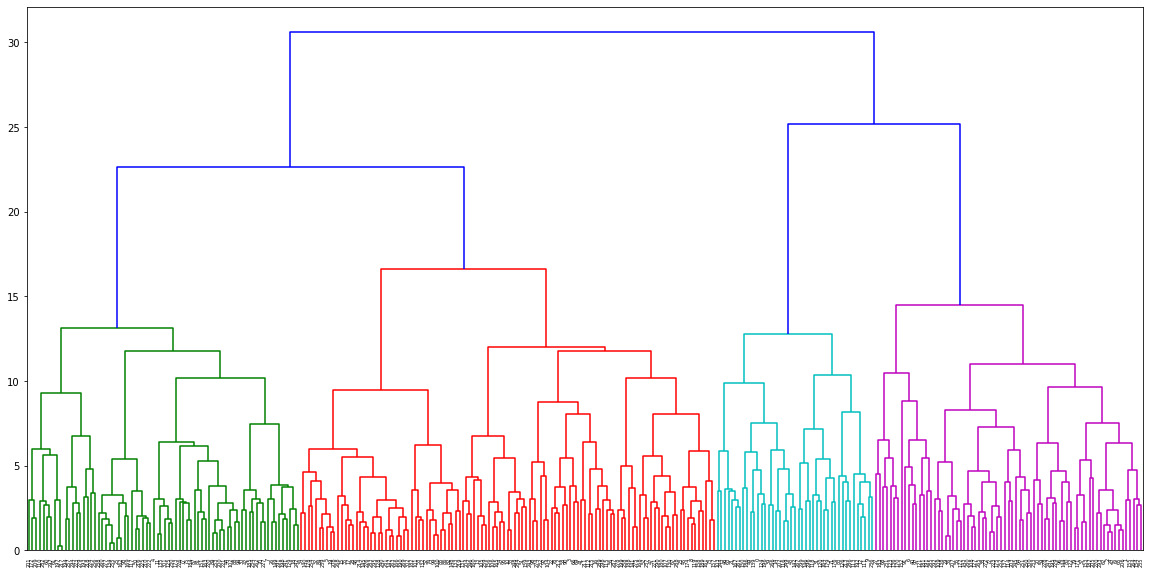

In [28]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

**WARD SEEMS SIMPLEST**

##**Try the three linkage methods above and get ARI and silhouette scores for each of your solutions**

**COMPLETE**

In [0]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [31]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.21394030618551016
The silhoutte score of the Agglomerative Clustering solution: 0.11730765444448985


**AVERAGE**

In [0]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [33]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.2940490133353465
The silhoutte score of the Agglomerative Clustering solution: 0.14837359969689895


**WARD**

In [0]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [38]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.146129913123814
The silhoutte score of the Agglomerative Clustering solution: 0.1387197366557222


**NONE PERFORM BETTER THAN SECTION 25.3 RESULTS**

**THE BEST OF THESE IS METRIC=AVERAGE**